In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df_cleaned = pd.read_csv('kc_house_data_cleaned.csv')

# Régréssion Linéaire

## Modèle 1 - Basique

In [75]:
# Transformer la colonne "zipcode" en une variable numérique
zipcodes = pd.get_dummies(df_cleaned["zipcode"], prefix="zipcode")
yr_built = pd.get_dummies(df_cleaned["yr_built"], prefix="yr_built")

# Combiner les variables avec d'autres variables explicatives
X = pd.concat([df_cleaned, zipcodes, yr_built], axis=1)
X = X.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long', 'zipcode', 'yr_built'], axis=1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned["price"], test_size=0.2, random_state=420)


#### Entraînement

In [76]:
# Entraîner le modèle de régression linéaire
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

#### Scoring

In [77]:
model.score(X_test, y_test)

0.8184652230201593

#### Prédiction

In [78]:
y_pred_test=model.predict(X_test)
y_pred_test

array([262325.13671875, 705657.390625  , 544993.765625  , ...,
       586543.5546875 , 561460.59375   , 368273.68359375])

In [79]:
y_test

8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64

#### Représentation

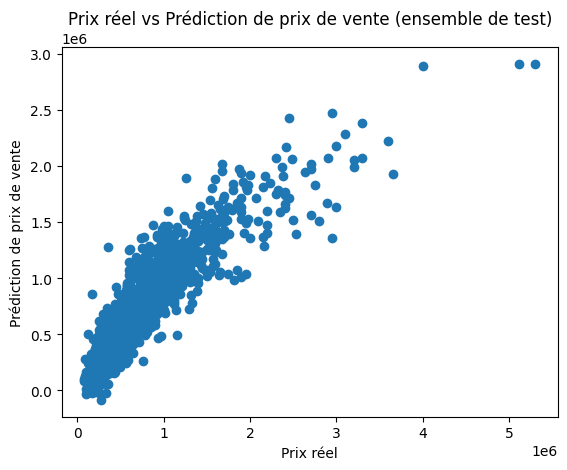

In [80]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Prix réel")
plt.ylabel("Prédiction de prix de vente")
plt.title("Prix réel vs Prédiction de prix de vente (ensemble de test)")
plt.show()

## Modèle 2 - MinMaxScaler

In [81]:
from sklearn.model_selection import train_test_split
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


numeric_transformer = Pipeline([
        ('stdscaler', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = ["zipcode","yr_built"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder()


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
linear = LinearRegression()

pipe = Pipeline([
     ('prep', preprocessor),
     ('linear', linear)
])

In [82]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
y_pred=trained_pipe.predict(X_test)

# scoring sur X_test
score = trained_pipe.score(X_test,y_test)

print(score)
print(y_pred)
print(y_test)

0.8184652991988743
[262322.93899153 705657.3241143  544993.01452801 ... 586544.85125046
 561455.05293684 368277.21281968]
8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64


## Modèle 3 - Polynomiales Features

In [105]:
from sklearn.model_selection import train_test_split
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# On ajoute PolynomialFeatures dans notre pipeline de prétraitement
numeric_transformer = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('stdscaler', MinMaxScaler())
])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = ["zipcode", "yr_built"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder()


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
linear = LinearRegression()

pipe = Pipeline([
     ('prep', preprocessor),
     ('linear', linear)
])

import pickle
with open('trained_pipeline.pkl', 'wb') as f:
    pickle.dump(trained_pipe, f)

In [84]:
X_train.head()

,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,yr_built,zipcode,has_basement,was_renovated
978,3,1.0,118.91584,809.370936,1.0,0,0,4,7,118.91584,1950_to_1975,98003,0,0
14162,3,2.0,152.36092,524.901950,1.0,0,0,3,7,152.36092,1997_to_2015,98042,0,1
18480,3,1.5,116.12875,668.344182,1.0,0,0,4,7,116.12875,1950_to_1975,98034,0,0
3478,3,2.0,163.50928,464.515000,1.0,0,0,5,7,89.18688,pre1950,98199,1,0
925,4,2.5,258.27034,973.623440,1.0,0,3,3,7,129.13517,1950_to_1975,98033,1,0


In [85]:
from sklearn.model_selection import GridSearchCV

params = {'prep__num__poly__degree': [2, 3, 4]}
grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best degree:", grid.best_params_['prep__num__poly__degree'])

Best degree: 2


In [86]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
y_pred=trained_pipe.predict(X_test)

# scoring sur X_test
score = trained_pipe.score(X_test,y_test)

print(score)
print(y_pred)
print(y_test)

0.8737605927785108
[239104. 461120. 515872. ... 600096. 516384. 369440.]
8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64


In [87]:
data = {
    'bedrooms': [4],
    'bathrooms': [1.0],
    'm2_living': [197.91584],
    'm2_lot': [1052.370936],
    'floors': [2.0],
    'waterfront': [1],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'm2_above': [178.91584],
    'yr_built': ['1950_to_1975'],
    'zipcode': [98198],
    'has_basement': [0],
    'was_renovated': [1]
}

X_test = pd.DataFrame(data)

In [88]:
# fit the pipeline on the training data
pipe.fit(X_train, y_train)

# use the pipeline to make predictions on the test data
y_pred = pipe.predict(X_test)

# print the predicted values
print(y_pred)

[-2.42364309e+14]


## Modèle 4 - Ridge

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import Ridge

# Diviser les données en ensembles de formation et de test
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)

# Créer un pipeline de prétraitement pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('stdscaler', MinMaxScaler())
])

# Créer un pré-processeur pour les variables catégorielles
categorical_features = ["zipcode", "yr_built"]
categorical_transformer = OneHotEncoder()

# Utiliser ColumnTransformer pour appliquer le pré-traitement à chaque type de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Définir un modèle de régression Ridge avec une valeur d'alpha de 1
ridge = Ridge(alpha=1)

# Créer un pipeline final qui applique le prétraitement et la régression Ridge
pipe = Pipeline([
    ('prep', preprocessor),
    ('ridge', ridge)
])

# Entraîner le modèle sur les données d'entraînement
pipe.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe.score(X_test, y_test)
print(f"Score sur les données de test: {score:.3f}")



Score sur les données de test: 0.873


In [6]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
y_pred=trained_pipe.predict(X_test)

# scoring sur X_test
score = trained_pipe.score(X_test,y_test)

import pickle 

with open('trained_pipeline_v2.pkl', 'wb') as f:
    pickle.dump(trained_pipe, f)
    
print(score)
print(y_pred)
print(y_test)

0.8725051668467998
[252977.79115135 546579.90688433 526584.69711565 ... 564667.09014473
 525760.10893452 365979.00573196]
8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64


In [123]:
data = {
    'bedrooms': [4],
    'bathrooms': [1.0],
    'm2_living': [197.91584],
    'm2_lot': [1052.370936],
    'floors': [2.0],
    'waterfront': [1],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'm2_above': [178.91584],
    'yr_built': ['1950_to_1975'],
    'zipcode': [98198],
    'has_basement': [0],
    'was_renovated': [1]
}

X_test = pd.DataFrame(data)

In [124]:
# fit the pipeline on the training data
pipe.fit(X_train, y_train)

# use the pipeline to make predictions on the test data
y_pred = pipe.predict(X_test)

# print the predicted values
print(y_pred)

[1010482.01308161]


## Modèle 5 : RobustScaler

In [8]:
from sklearn.preprocessing import RobustScaler

# Créer un pipeline de prétraitement pour les variables numériques avec RobustScaler
numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('robustscaler', RobustScaler())
])

# Utiliser ColumnTransformer pour appliquer le pré-traitement à chaque type de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Créer un pipeline final qui applique le prétraitement et la régression Ridge
pipe = Pipeline([
    ('prep', preprocessor),
    ('ridge', ridge)
])

# Entraîner le modèle sur les données d'entraînement
pipe.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe.score(X_test, y_test)
print(f"Score sur les données de test avec RobustScaler: {score}")


Score sur les données de test avec RobustScaler: 0.8704193705073138


# Knn

## Modèle 6 - MinMaxScaler - Hyperparamètres non optimisés

In [89]:
from sklearn.model_selection import train_test_split
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


numeric_transformer = Pipeline([
        ('stdscaler', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = ["zipcode","yr_built"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder()


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entrainement
from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [90]:
print(X.dtypes)

bedrooms           int64
bathrooms        float64
m2_living        float64
m2_lot           float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
m2_above         float64
yr_built          object
zipcode            int64
has_basement       int64
was_renovated      int64
dtype: object


In [91]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
y_pred=trained_pipe.predict(X_test)

# scoring sur X_test
score = trained_pipe.score(X_test,y_test)

print(score)
print(y_pred)
print(y_test)

0.7341720316993996
[227333.33333333 545816.66666667 514833.33333333 ... 533333.33333333
 459388.33333333 400000.        ]
8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64


## Modèle 7 - MinMaxScaler - Hyperparamètres optimisés

In [92]:
from sklearn.model_selection import train_test_split
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


numeric_transformer = Pipeline([
        ('stdscaler', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = ["zipcode","yr_built"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder()


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance']
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Adapter le GridSearchCV aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le score correspondant
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Utiliser les meilleurs hyperparamètres pour entraîner un nouveau modèle
best_params = grid_search.best_params_
knn_best = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], 
                                weights=best_params['knn__weights'])
pipe_best = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_best)
]) 

Best parameters: {'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Best score: 0.7124030135942697


In [93]:
import pickle 

with open('trained_pipeline.pkl', 'wb') as f:
    pickle.dump(trained_pipe, f)
    
# Entrainement sur X_train
trained_pipe = pipe_best.fit(X_train,y_train)

# prediction sur X_test
y_pred=trained_pipe.predict(X_test)

# scoring sur X_test
score = trained_pipe.score(X_test,y_test)

print(score)
print(y_pred)
print(y_test)

0.7432296456512788
[256242.15119213 527636.67011704 505822.88668635 ... 579486.23231819
 443605.33479549 378397.59510863]
8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
           ...   
14763    213675.0
14289    400000.0
7275     485000.0
20525    374500.0
20869    428000.0
Name: price, Length: 4323, dtype: float64


In [94]:
X_test.head()

,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,yr_built,zipcode,has_basement,was_renovated
8878,4,2.00,203.45757,1341.426417,1.0,0,0,4,7,109.62554,1975_to_1997,98001,1,0
19302,8,3.00,356.74752,1485.518970,1.0,0,0,3,7,235.04459,1950_to_1975,98034,1,0
1564,3,1.00,167.22540,534.192250,1.0,0,0,3,7,96.61912,pre1950,98117,1,0
4055,2,1.00,127.27711,550.171566,1.0,0,2,3,8,104.98039,pre1950,98199,1,0
7526,5,2.75,253.62519,594.672103,2.0,0,0,3,8,253.62519,1997_to_2015,98072,0,1


In [95]:
y_test.head()

8878     280000.0
19302    575000.0
1564     610000.0
4055     703011.0
7526     614285.0
Name: price, dtype: float64

## Modèle 8 : RobustScaler

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

# Diviser les données en ensembles de formation et de test
y = df_cleaned['price']
X = df_cleaned.drop(['price', 'date', 'm2_lot15', 'm2_living15', 'price_m2', 'id', 'lat', 'long'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)

# Créer un pipeline de prétraitement pour les variables numériques
numeric_features = X.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_transformer = Pipeline([
    ('robustscaler', RobustScaler())
])

# Créer un pré-processeur pour les variables catégorielles
categorical_features = ["zipcode", "yr_built"]
categorical_transformer = OneHotEncoder()

# Utiliser ColumnTransformer pour appliquer le pré-traitement à chaque type de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Définir un modèle de régression Ridge avec une valeur d'alpha de 1
knn = KNeighborsRegressor()

# Créer un pipeline final qui applique le prétraitement et la régression Ridge
pipe = Pipeline([
    ('prep', preprocessor),
    ('knn', knn)
])

# Définir les paramètres à tester
param_grid = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance']
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Adapter le GridSearchCV aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le score correspondant
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Utiliser les meilleurs hyperparamètres pour entraîner un nouveau modèle
best_params = grid_search.best_params_
knn_best = KNeighborsRegressor(n_neighbors=best_params['knn__n_neighbors'], 
                                weights=best_params['knn__weights'])
pipe_best = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_best)
])

# Entraîner le modèle sur les données d'entraînement
pipe_best.fit(X_train, y_train)

# Évaluer la performance du modèle sur les données de test
score = pipe_best.score(X_test, y_test)
print(f"Score sur les données de test: {score:.3f}")


Best parameters: {'knn__n_neighbors': 6, 'knn__weights': 'distance'}
Best score: 0.7817986450492305
Score sur les données de test: 0.820
